In [176]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-in-delhi-ncr/DelhiNCR Restaurants.csv


## Introduction

The following dataset is concerned with details of restaurants having collaboration with Zomato, in Delhi. The purpose of this notebook is to do some simple exploratory data analysis in an attmept to answer some specfic queries. The features related to food price and rating are of particular focus here, hence most of the analysis is with respect to these features. It is evident that in priciple, one could do a much more comprehensive analysis taking the food category and customer feedback feaures. However, we restrict only to specific localities and categories that have the highest appearence


### Importing dataset for analysis

In [177]:
data_zom = pd.read_csv("/kaggle/input/zomato-restaurants-in-delhi-ncr/DelhiNCR Restaurants.csv")

### Preliminary overview

In [178]:
print("Size of dataset is: ", data_zom.shape)
data_zom.head()


Size of dataset is:  (1965, 15)


,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Known_For2,Known_For22
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


### Checking for null values and feature types

In [179]:
data_zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965 entries, 0 to 1964
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant_Name        1965 non-null   object 
 1   Category               1965 non-null   object 
 2   Pricing_for_2          1965 non-null   int64  
 3   Locality               1965 non-null   object 
 4   Dining_Rating          1965 non-null   float64
 5   Dining_Review_Count    1965 non-null   int64  
 6   Delivery_Rating        1563 non-null   float64
 7   Delivery_Rating_Count  1965 non-null   int64  
 8   Website                1965 non-null   object 
 9   Address                1965 non-null   object 
 10  Phone_No               1965 non-null   object 
 11  Latitude               1965 non-null   float64
 12  Longitude              1965 non-null   float64
 13  Known_For2             1560 non-null   object 
 14  Known_For22            1124 non-null   object 
dtypes: f

### Separate list of categorical and numerical features

In [180]:
num_fea = data_zom.select_dtypes(include = ["int", "float"]).columns.to_list()
cat_fea = data_zom.select_dtypes(include = "object").columns.to_list()

print("The numerical feaures are ", num_fea)
print("The categorical features are ", cat_fea)

The numerical feaures are  ['Pricing_for_2', 'Dining_Rating', 'Dining_Review_Count', 'Delivery_Rating', 'Delivery_Rating_Count', 'Latitude', 'Longitude']
The categorical features are  ['Restaurant_Name', 'Category', 'Locality', 'Website', 'Address', 'Phone_No', 'Known_For2', 'Known_For22']


### Relevant changes in column 

In [181]:
data_zom.rename(columns = {"Known_For2" : "Restaurant speciality", "Known_For22" : "Customer feedback"}, inplace =True)
data_zom.head()

,Restaurant_Name,Category,Pricing_for_2,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Latitude,Longitude,Restaurant speciality,Customer feedback
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",2100,"ITO, New Delhi",4.9,1885,4.4,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,28.638167,77.240472,NaN,NaN
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",1200,"Pragati Maidan, New Delhi",4.9,3748,3.9,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,28.613429,77.242471,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,..."
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",5000,"ITC Maurya, Chanakyapuri, New Delhi",4.9,1371,NaN,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,28.598200,77.173661,"Royal ambiance and Mughlai cuisine, also recei...",NaN
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",1600,"Cyber Hub, DLF Cyber City, Gurgaon",4.9,2636,4.4,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,28.494464,77.088532,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie..."
4,The Big Chill,"Continental, American, Italian",1500,"Khan Market, New Delhi",4.9,6487,NaN,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,28.600350,77.227493,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ..."


In [182]:
# Since the dataset already contains a detailed address, the geographical coordinates may not serve a very useful purpose. Assuming this
# we drop the latitude and longitude columns

data_zom = data_zom.drop(["Latitude", "Longitude"], axis = 1)


In [183]:
# We can also drop the later part of the locality address and keep only the specific locality name

data_zom["loc_add"] = data_zom["Locality"].str.split(",")

data_zom["Locality"] = data_zom["loc_add"].apply(lambda x: x[0])
data_zom = data_zom.drop("loc_add", axis=1)

### Filling missing values

In [184]:
data_zom["Restaurant speciality"] = data_zom["Restaurant speciality"].fillna(data_zom["Restaurant speciality"].value_counts().index[0])
data_zom["Customer feedback"] =  data_zom["Customer feedback"].fillna(data_zom["Customer feedback"].value_counts().index[0])
data_zom["Delivery_Rating"] = data_zom["Delivery_Rating"].fillna((data_zom["Delivery_Rating"].mean()))

data_zom.isnull().sum().sum()

0

### Making a price category

In [185]:
# The price column has a very wide range of values and many restaurants seem to have price values differ only by Rs.100-200. As such, it may be worth 
# making a column with prices falling under a specific range, instead of the exact value. Also, this might be actually more relevant for
# people choosing a restaurant, since very rarely the price is same for different people

data_zom["Price_range(2)"] = pd.cut(x = data_zom["Pricing_for_2"], bins = [0,500,1000,1500,2000,2500,3000,4000,9000],
                                   labels=["cost < 500", "500-1000", "1000-1500", "1500-2000", "2000-3000", "3000-4000", "4000-5000",
                                             "5000 < cost "])

data_zom = data_zom.drop("Pricing_for_2", axis = 1)


In [186]:
# We can now check how many restaurants belong to each price category

price_data = data_zom["Price_range(2)"].value_counts()
price_data



cost < 500      705
500-1000        559
1000-1500       247
1500-2000       230
2000-3000        92
4000-5000        55
3000-4000        48
5000 < cost      29
Name: Price_range(2), dtype: int64

Text(0.5, 1.0, 'No. of restaurants in each price catergory')

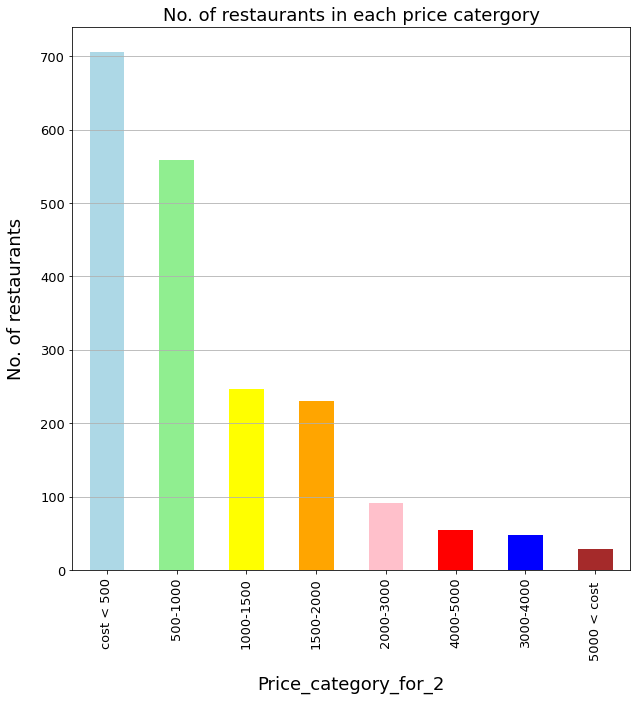

In [187]:
# We can also plot the above result for a better understanding

c = ["lightblue", "lightgreen", "yellow", "orange", "pink", "red", "blue", "brown"]
data_zom["Price_range(2)"].value_counts().plot(kind = "bar", figsize = (10,10), color = c)
plt.grid(zorder = 0, axis = "y")
plt.xlabel("Price_category_for_2", fontsize = 18, labelpad=15)
plt.ylabel("No. of restaurants", fontsize = 18, labelpad=15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("No. of restaurants in each price catergory", fontsize = 18)

In [188]:
# A similar thing could also be done for the dining rating column as very often, all the items of a restaurant are not of same qualtiy. So, we
# make another column called rating category with values very good, good and average correspondig to rating values above 4.4, between 4.0 - 4.4
# and below 4.0

data_zom["Rating_category"] = pd.cut(x = data_zom["Dining_Rating"], bins = [0,3.9,4.4,5],
                                   labels=["Average", "Good", "Very Good"])

data_zom[data_zom["Rating_category"]== "Average"].groupby("Price_range(2)")


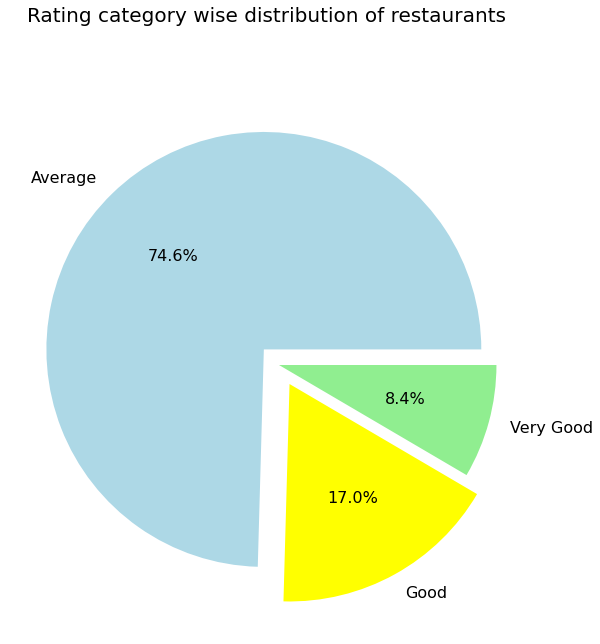

In [207]:
# We can check the percent wise ditribution of restaurants withing each rating category

x = data_zom["Rating_category"].value_counts()
colors = "lightblue", "yellow", "lightgreen"
labels = "Average", "Good", "Very Good"
explode = (0.1,0.1,0)
fig, ax = plt.subplots()

ax.pie(x, labels = labels, explode= explode, colors = colors, radius =1, textprops={'fontsize': 16}, autopct='%1.1f%%')
plt.suptitle("Rating category wise distribution of restaurants ", size =20, y=1)
plt.show()

In [190]:
data_zom.head()

,Restaurant_Name,Category,Locality,Dining_Rating,Dining_Review_Count,Delivery_Rating,Delivery_Rating_Count,Website,Address,Phone_No,Restaurant speciality,Customer feedback,Price_range(2),Rating_category
0,Rustom's,"Parsi, Street Food, North Indian, Desserts, Be...",ITO,4.9,1885,4.400000,1844,https://www.zomato.com/ncr/rustoms-ito-new-delhi,"Delhi Parsi Anjuman, LNJP Colony, Bahadur Shah...",9.1991E+11,"Get a complimentary night, earn up to 50% of s...","Pretty Decor, Perfect Presentation, Tamper Pro...",2000-3000,Very Good
1,Cafe Lota,"Cafe, South Indian, North Indian, Beverages",Pragati Maidan,4.9,3748,3.900000,37,https://www.zomato.com/ncr/cafe-lota-pragati-m...,"National Crafts Museum, Gate 2, Bhairon Marg, ...",9.17839E+11,"Pondicherry Fish Curry, Coconut Rabdi, Sabudan...","Artistic Decor, The Service, Natural Ambience,...",1000-1500,Very Good
2,Dum-Pukht - ITC Maurya,"Mughlai, North Indian, Desserts",ITC Maurya,4.9,1371,3.964299,0,https://www.zomato.com/ncr/dum-pukht-itc-maury...,"ITC Maurya, Chanakyapuri, New Delhi",9.11146E+11,"Royal ambiance and Mughlai cuisine, also recei...","Pretty Decor, Perfect Presentation, Tamper Pro...",5000 < cost,Very Good
3,Burma Burma,"Asian, Burmese, Bubble Tea, Desserts, Salad",Cyber Hub,4.9,2636,4.400000,1238,https://www.zomato.com/ncr/burma-burma-dlf-cyb...,"Shop 6, Ground Floor, Building 8, Tower C, Cyb...",9.11244E+11,"Coconut Milk Dessert, Honey Caviar, Kaffir Lim...","Knowledgeable Staff, Authentic, Soothing Ambie...",1500-2000,Very Good
4,The Big Chill,"Continental, American, Italian",Khan Market,4.9,6487,3.964299,0,https://www.zomato.com/ncr/the-big-chill-khan-...,"68-A, Khan Market, New Delhi",9.11142E+11,"Irish Cream Tiramisu, Penne Vodka, Mississippi...","Retro Ambience, Yummy Desserts, Big Portions, ...",1000-1500,Very Good


In [191]:
data_zom[data_zom["Rating_category"]== "Very Good"]["Price_range(2)"].value_counts()

1000-1500       35
1500-2000       35
500-1000        33
cost < 500      23
2000-3000       21
5000 < cost      7
3000-4000        6
4000-5000        6
Name: Price_range(2), dtype: int64

### No. of very good category restaurants within each price category

Text(0.5, 1.05, 'No. of very good category restaurants in each price category')

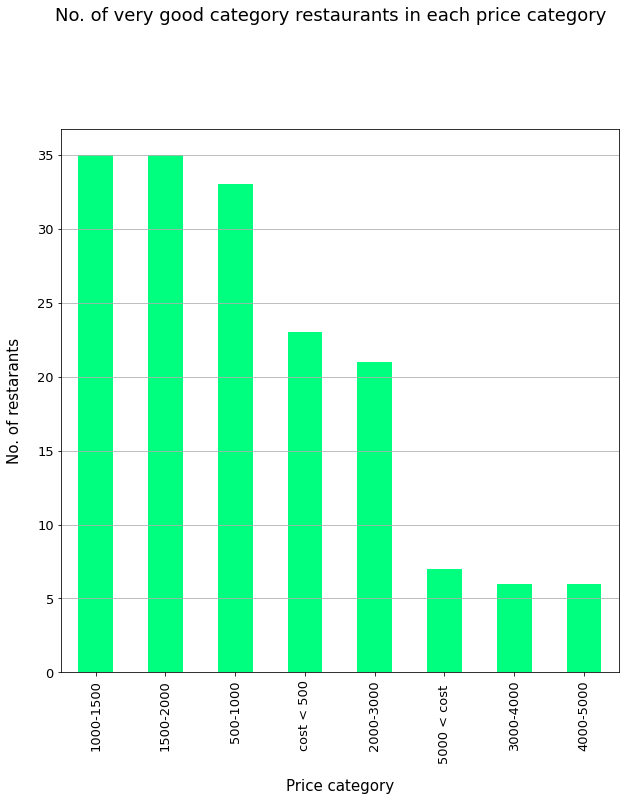

In [192]:
# It could also be intersting to see how many very good category restaurants belong to each price category

Bar_data = data_zom[data_zom["Rating_category"]== "Very Good"]["Price_range(2)"].value_counts()
Bar_data.plot(kind = "bar", figsize = (10,10), color = "springgreen")
plt.xlabel("Price category", fontsize = 15, labelpad =15)
plt.grid(zorder = 0, axis = "y")
plt.ylabel("No. of restarants", fontsize = 15, labelpad = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.suptitle("No. of very good category restaurants in each price category", fontsize = 18, y=1.05)

### Which localities have the maximum number of very good category restaurants?

In [193]:
# The top 10 places with maximum number of very good restaurants

f1 =  data_zom["Rating_category"] == "Very Good"
data_zom[f1]["Locality"].value_counts()[0:10]

 Connaught Place            8
 Sector 29                  6
 Khan Market                5
 Cyber Hub                  4
 Mehrauli                   4
 Chandni Chowk              4
 Ambience Mall              4
 Cross Point Mall           3
 Greater Kailash 2 (GK2)    3
 Hauz Khas Village          3
Name: Locality, dtype: int64

Text(0.5, 1.05, 'Top 10 localities with max no. of high quality restaurants')

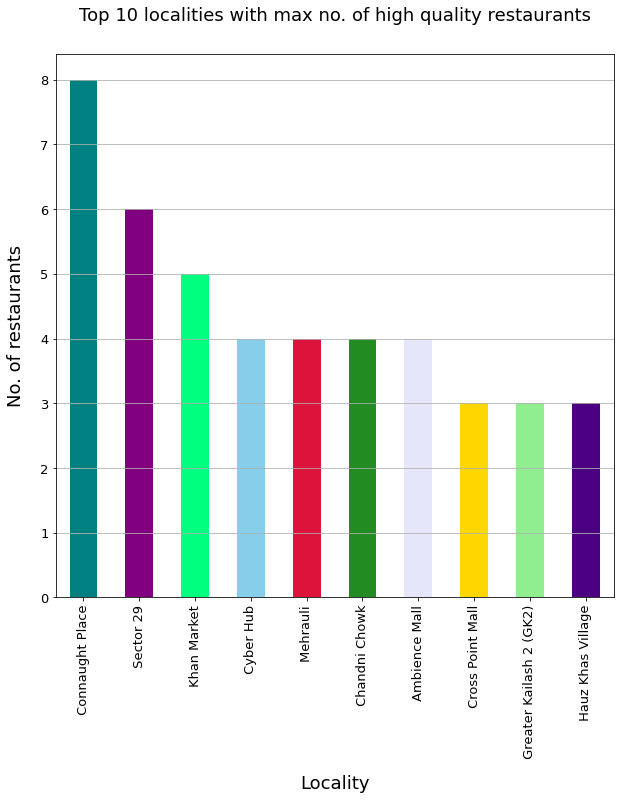

In [194]:
f1 =  data_zom["Rating_category"] == "Very Good"
color = "teal", "purple", "springgreen", "skyblue", "crimson", "forestgreen","lavender", "gold", "lightgreen", "indigo"
data_zom[f1]["Locality"].value_counts()[0:10].plot(kind = "bar", color = color, figsize = (10,10))
plt.grid(zorder = 0, axis = "y")
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xlabel("Locality", fontsize = 18, labelpad=12)
plt.ylabel("No. of restaurants", fontsize = 18, labelpad=15)
plt.title("Top 10 localities with max no. of high quality restaurants", fontsize = 18, y=1.05)

### Top 10 places with maximum number of restaurants(any rating category)

In [195]:
d1 = data_zom["Locality"].value_counts()[0:10]
print(d1)
loc = [" Connaught Place", " Rohini", " Sector 29", " Rajouri Garden", " Delhi University-GTB Nagar ",
       " Punjabi Bagh", " Safdarjung", " Janakpuri", " Indirapuram", " Raj Nagar"]




 Connaught Place               69
 Sector 29                     34
 Rohini                        34
 Rajouri Garden                31
 Punjabi Bagh                  26
 Delhi University-GTB Nagar    26
 Safdarjung                    24
 Janakpuri                     22
 Indirapuram                   21
 Raj Nagar                     21
Name: Locality, dtype: int64


### Distribution of very good category restaurants within the top 10 localities

In [196]:
# We can check what percent of the very good restaurants are present in the top 10 places

c1 =  data_zom["Rating_category"] ==  "Very Good"
loc = [" Connaught Place", " Rohini", " Sector 29", " Rajouri Garden", " Delhi University-GTB Nagar ",
       " Punjabi Bagh", " Safdarjung", " Janakpuri", " Indirapuram", " Raj Nagar"]

temp_df = data_zom[data_zom["Locality"].isin(loc)][c1]
temp_df["Locality"].value_counts().tolist()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


[8, 6, 2, 2, 1, 1]

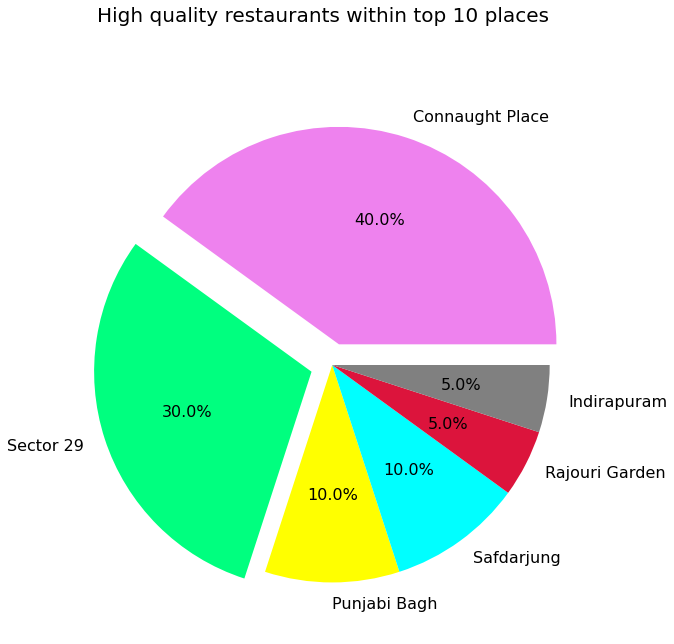

In [208]:
x = temp_df["Locality"].value_counts().tolist()

fig, ax = plt.subplots()
colors = "violet", "springgreen", "yellow", "aqua", "crimson", "grey"
labels = "Connaught Place" , "Sector 29", "Punjabi Bagh" , "Safdarjung", "Rajouri Garden", "Indirapuram"
explode = (0.1,0.1,0,0,0,0)
ax.pie(x, explode= explode,labels = labels,colors=colors, radius = 1,textprops={'fontsize': 16}, autopct='%1.1f%%')
plt.suptitle("High quality restaurants within top 10 places", size = 20, y=1)
plt.show()

In [198]:
# The above data indicates that Raj nagar, Rohini, DU DTB nagar and Safdarjung despite having multiple resturants, do not have any one of them 
# in the very good category

### Analysis on food category

In [199]:
# Considering that Delhi lies in the norther part of India, it could be interesting to find the top 10 Localities
# having maximum number of south indian serving resturants

r1 = data_zom["Category"].str.contains("South Indian")
r2 = data_zom["Locality"].isin(loc)
data_zom[r1][r2]["Locality"].value_counts()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


 Rohini             6
 Connaught Place    5
 Raj Nagar          3
 Indirapuram        2
 Safdarjung         1
Name: Locality, dtype: int64

In [200]:
# The top 3 most common food category includes North Indian, Chinese and Mughlai. We may want to study different aspects considering
# these three food categories individually and also together

data_zom["Category"].value_counts()[0:3]

North Indian             88
North Indian, Chinese    39
North Indian, Mughlai    37
Name: Category, dtype: int64

### Which localities have the most north india serving restaurants?

In [201]:
f1 = data_zom["Category"].str.contains("North Indian")
f2 = data_zom["Rating_category"]== "Very Good"

data_zom[f1][f2]["Locality"].value_counts()[0:5]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


 Connaught Place          5
 Sector 29                5
 Pandara Road Market      2
 Ashok Vihar Phase 2      2
 Eros City Square Mall    2
Name: Locality, dtype: int64

### Localities serving both north indian and south indian food

In [202]:
d_1 = data_zom["Category"].str.contains("North Indian" and "South Indian")
data_zom[d_1].Locality.value_counts()

 Rohini             6
 Connaught Place    5
 Shahdara           5
 Karol Bagh         3
 DLF Phase 3        3
                   ..
 JNU                1
 Sector 39          1
 DLF Avenue         1
 Sector 16          1
 Moti Nagar         1
Name: Locality, Length: 97, dtype: int64

### Compare the number of restaurants serving only north indian, chinese and both together

In [203]:
c1 =  data_zom["Category"] == "North Indian"
c2 =  data_zom["Category"] == "Chinese"
c3 =  data_zom["Category"].str.contains("North Indian" and "Chinese")
list = [" Connaught Place", " Rohini", " Sector 29", " Rajouri Garden", " Delhi University-GTB Nagar ",
       " Punjabi Bagh", " Safdarjung", " Janakpuri", " Indirapuram", " Raj Nagar"]

dict_1 =  data_zom[c1][data_zom["Locality"].isin(list)]["Locality"].value_counts().to_dict()
print("Only north indian \n ",  dict_1)
dict_2 =  data_zom[c2][data_zom["Locality"].isin(list)]["Locality"].value_counts().to_dict()
print("Only chinese \n",  dict_2)
dict_3 =  data_zom[c3][data_zom["Locality"].isin(list)]["Locality"].value_counts().to_dict()
print("Both north indian and chinese \n ",  dict_3)


Only north indian 
  {' Rohini': 4, ' Rajouri Garden': 2, ' Janakpuri': 1, ' Raj Nagar': 1}
Only chinese 
 {' Sector 29': 1, ' Connaught Place': 1}
Both north indian and chinese 
  {' Connaught Place': 26, ' Rajouri Garden': 20, ' Rohini': 16, ' Sector 29': 16, ' Indirapuram': 14, ' Janakpuri': 13, ' Raj Nagar': 12, ' Safdarjung': 11, ' Punjabi Bagh': 11}


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [204]:
# From the aobve data we can create three different lists containing the numbe of resturants in each of the 10 localities corresponding to the food
# category

x_1 = []
for elm in list:
    if elm in dict_1.keys():
        x_1.append(dict_1[elm])
    else:
        x_1.append(0)
        
x_2 = []
for elm in list:
    if elm in dict_2.keys():
        x_2.append(dict_2[elm])
    else:
        x_2.append(0)
        
x_3 = []

for elm in list:
    if elm in dict_3.keys():
        x_3.append(dict_3[elm])
    else:
        x_3.append(0)
    

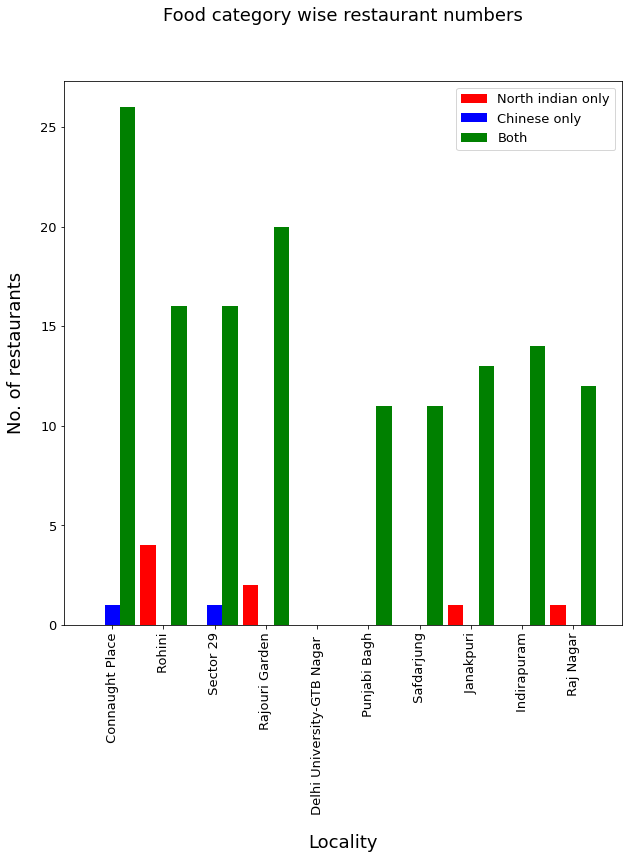

In [205]:
# From the above info, we can now make three list of values of the corresponding three food category of interest , for the localities of interest.

N= 10
width = 0.3
ind = np.arange(N)
bar1 = plt.bar(ind, x_1, width, color = "r")
bar2 = plt.bar(ind + width, x_2, width, color = "b")
bar3 = plt.bar(ind + width*2, x_3, width, color = "g")

plt.xlabel("Locality", fontsize = 18, labelpad=15)
plt.ylabel("No. of restaurants", fontsize = 18, labelpad=15)
plt.title("Food category wise restaurant numbers", fontsize =18, y=1.1)
plt.xticks(ind+width, list, rotation= 90, fontsize=13)
plt.yticks(fontsize =13)
plt.legend((bar1, bar2, bar3), ("North indian only", "Chinese only", "Both"), fontsize =13)
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

# 